In [4]:
# from methods import OA_SA, VA_SA
import numpy as np
from envs import DynamicQVRPEnv
from methods import Agent, GreedyAgent, MSAAgent, OfflineAgent
from experiments import run_agent
import matplotlib.pyplot as plt
import pickle


Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 18.2     |
|    exploration_rate | 0.953    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 15024    |
|    time_elapsed     | 0        |
|    total_timesteps  | 124      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.55     |
|    n_updates        | 1        |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 23       |
|    exploration_rate | 0.921    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 11293    |
|    time_elapsed     | 0        |
|    total_timesteps  | 208      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.523    |
|  

In [2]:
# env_configs = {
#         "K" : 50,
#         "Q" : 100, 
#         "DoD" : 0.5,
#         "vehicle_capacity" : 25,
#         "re_optimization" : False,
#         "costs_KM" : [1, 1],
#         "emissions_KM" : [.1, .3]
#     }

# env_configs = {
#             "K" : 50,
#             "Q" : 70, 
#             "DoD" : 0.7,
#             "vehicle_capacity" : 25,
#             "re_optimization" : True,
#             "costs_KM" : [1, 1],
#             "emissions_KM" : [.1, .3],
#             "n_scenarios" : 500
#         }

In [19]:

# file = "res_wReOpt_500"
# file = "res_TSP"
file = "res_TSP_fullDynamic"
with open(f'results/{file}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)


with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

with open(f'results/{file}/res_SL.pkl', "rb") as f:
    res_SL = pickle.load(f)
    
with open(f'results/{file}/res_RL.pkl', "rb") as f:
    res_RL = pickle.load(f)

with open(f'results/{file}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)

with open(f'results/{file}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)

In [20]:
print(env_configs)
res_greedy.keys()

{'K': 50, 'Q': 100, 'DoD': 1.0, 'vehicle_capacity': 30, 're_optimization': False, 'costs_KM': [1], 'emissions_KM': [0.3], 'n_scenarios': 500}


dict_keys(['rs', 'actions', 'infos'])

Text(0.5, 1.0, 'online/offline ratio')

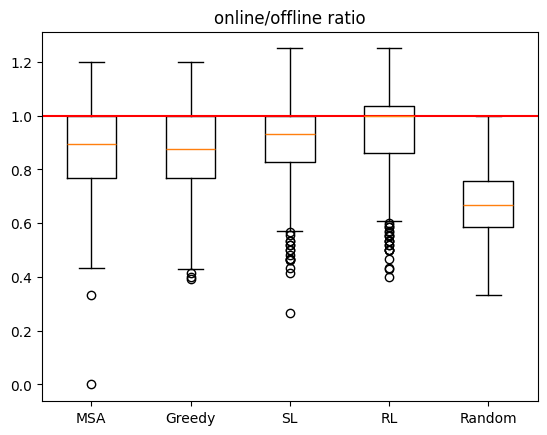

In [21]:
# gap = [
#     res_offline["rs"]/res_MSA["rs"] -1, res_offline["rs"]/res_greedy["rs"]-1, res_offline["rs"]/res_random["rs"]-1
# ]

gap = [
    res_MSA["rs"]/res_offline["rs"],
    res_greedy["rs"]/res_offline["rs"],
    res_SL["rs"]/res_offline["rs"],
    res_RL["rs"]/res_offline["rs"],
    res_random["rs"]/res_offline["rs"],
]

plt.boxplot(
    gap,
    tick_labels=[
        "MSA", 
        "Greedy", 
        "SL", 
        "RL", 
        "Random"],
)
plt.hlines(1, 0.5, len(gap)+.5, colors='red')
plt.title("online/offline ratio")
# plt.hlines(np.mean(r_MSA_woRO/r_offline_woRO), 0.5, 2.5, colors='red', linestyles='--')

Text(0.5, 1.0, 'online/offline ratio')

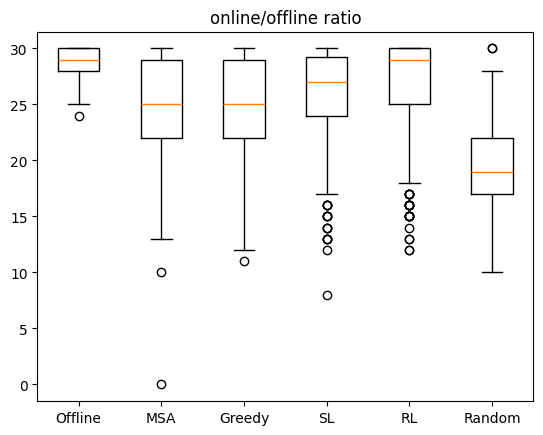

In [22]:
qs = [
    res_offline["rs"],
    res_MSA["rs"],
    res_greedy["rs"],
    res_SL["rs"],
    res_RL["rs"],
    res_random["rs"],
]

plt.boxplot(
    qs,
    tick_labels=[
        "Offline",  
        "MSA", 
        "Greedy", 
        "SL", 
        "RL", 
        "Random"],
)
# plt.hlines(1, 0.5, len(qs)+.5, colors='red')
plt.title("online/offline ratio")
# plt.hlines(np.mean(r_MSA_woRO/r_offline_woRO), 0.5, 2.5, colors='red', linestyles='--')

Text(0.5, 1.0, 'Mean rewards by methods')

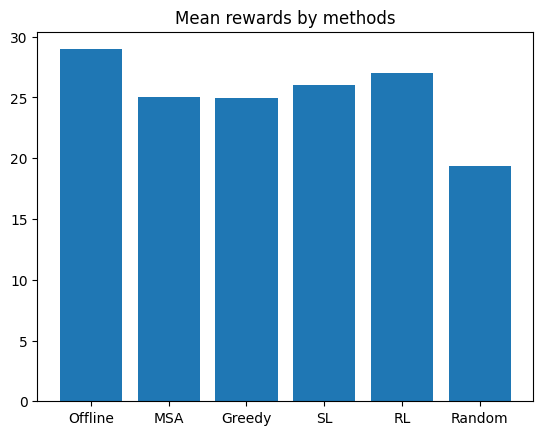

In [26]:
# gap = [
#     res_offline["rs"]/res_MSA["rs"] -1, res_offline["rs"]/res_greedy["rs"]-1, res_offline["rs"]/res_random["rs"]-1
# ]

gap = [
    res_offline["rs"].mean(),
    res_MSA["rs"].mean(),
    res_greedy["rs"].mean(),
    res_SL["rs"].mean(),
    res_RL["rs"].mean(),
    res_random["rs"].mean(),
]

plt.bar(
    height=gap,
    x=[
        "Offline", 
        "MSA", 
        "Greedy", 
        "SL", 
        "RL", 
        "Random"],
)
# plt.hlines(1, 0.5, len(gap)+.5, colors='red')
plt.title("Mean rewards by methods")
# plt.hlines(np.mean(r_MSA_woRO/r_offline_woRO), 0.5, 2.5, colors='red', linestyles='--')

Text(0, 0.5, 'Improvement in %')

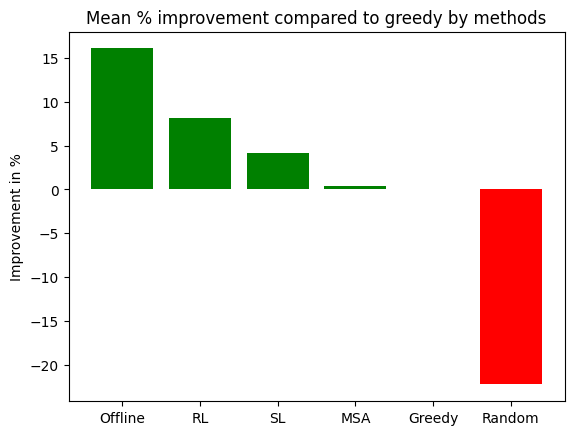

In [ ]:
gap = np.array([
    res_offline["rs"].mean()/res_greedy["rs"].mean(),
    res_MSA["rs"].mean()/res_greedy["rs"].mean(),
    res_greedy["rs"].mean()/res_greedy["rs"].mean(),
    res_SL["rs"].mean()/res_greedy["rs"].mean(),
    res_RL["rs"].mean()/res_greedy["rs"].mean(),
    res_random["rs"].mean()/res_greedy["rs"].mean(),
])

args = np.argsort(-gap)
gap = gap[args]

gap -= 1

mask_neg = gap < 0
mask_pos = gap >= 0

x = np.array([
        "Offline", 
        "MSA", 
        "Greedy", 
        "SL", 
        "RL", 
        "Random"
])

x = x[args]

plt.bar(
    x[mask_pos],
    100*gap[mask_pos],
    color='green'
)

plt.bar(
    x[mask_neg],
    100*gap[mask_neg],
    color='red'
)

# plt.hlines(1, 0.5, len(gap)+.5, colors='red')
plt.title("Mean % improvement compared to greedy by methods")
plt.ylabel("Improvement in %")
# plt.hlines(np.mean(r_MSA_woRO/r_offline_woRO), 0.5, 2.5, colors='red', linestyles='--')

In [25]:
print(gap)

[np.float64(28.966), np.float64(25.06), np.float64(24.954), np.float64(25.996), np.float64(19.4)]


/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_15247/382758438.py:2: RuntimeWarning: invalid value encountered in divide
  res_MSA["rs"]/res_MSA["rs"],
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_15247/382758438.py:3: RuntimeWarning: divide by zero encountered in divide
  res_greedy["rs"]/res_MSA["rs"],
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_15247/382758438.py:4: RuntimeWarning: divide by zero encountered in divide
  res_SL["rs"]/res_MSA["rs"],
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_15247/382758438.py:5: RuntimeWarning: divide by zero encountered in divide
  res_RL["rs"]/res_MSA["rs"],
/var/folders/6y/xmdymgfj6t79xkdq239jvsmm0000gn/T/ipykernel_15247/382758438.py:6: RuntimeWarning: divide by zero encountered in divide
  res_random["rs"]/res_MSA["rs"],


Text(0.5, 1.0, 'methods/MSA ratio')

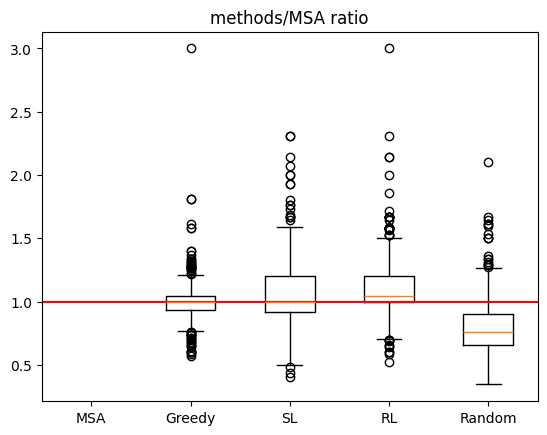

In [12]:
gap = [
    res_MSA["rs"]/res_MSA["rs"],
    res_greedy["rs"]/res_MSA["rs"],
    res_SL["rs"]/res_MSA["rs"],
    res_RL["rs"]/res_MSA["rs"],
    res_random["rs"]/res_MSA["rs"],
]

plt.boxplot(
    gap,
    tick_labels=[
        "MSA", 
        "Greedy", 
        "SL", 
        "RL", 
        "Random"],
)
plt.hlines(1, 0.5, len(gap)+.5, colors='red')
plt.title("methods/MSA ratio")

Text(0.5, 1.0, 'methods/greedy ratio')

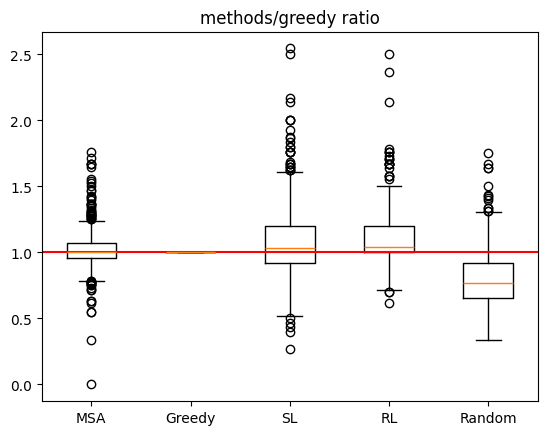

In [ ]:
gap = [
    res_MSA["rs"]/res_greedy["rs"],
    res_greedy["rs"]/res_greedy["rs"],
    res_SL["rs"]/res_greedy["rs"],
    res_RL["rs"]/res_greedy["rs"],
    res_random["rs"]/res_greedy["rs"],
]

plt.boxplot(
    gap,
    tick_labels=[
        "MSA", 
        "Greedy", 
        "SL", 
        "RL", 
        "Random"],
)
plt.hlines(1, 0.5, len(gap)+.5, colors='red')
plt.title("methods/greedy ratio")

Different DoDs

In [11]:
GreedySL = []
GreedyRL = []
x = [1., .95, .9, .85, .8, .75]

for dod in x:
    with open(f'results/DoD{dod}/res_SL.pkl', "rb") as f: res_SL = pickle.load(f)
    with open(f'results/DoD{dod}/res_RL.pkl', "rb") as f: res_RL = pickle.load(f)
    with open(f'results/DoD{dod}/res_greedy.pkl', "rb") as f: res_greedy = pickle.load(f)
    
    GreedySL.append(100*(res_SL["rs"].mean()/res_greedy["rs"].mean() -1))
    GreedyRL.append(100*(res_RL["rs"].mean()/res_greedy["rs"].mean() -1))
    
print(GreedySL)
print(GreedyRL)

[np.float64(0.7759852971206627), np.float64(-24.44587906176028), np.float64(-3.21810325221743), np.float64(-0.4822763443453226), np.float64(-0.06415191172697288), np.float64(0.09596928982726904)]
[np.float64(1.8174392485194923), np.float64(1.8721755971594423), np.float64(1.8762792813281637), np.float64(2.0135037376416642), np.float64(1.9502181164998689), np.float64(1.9330956950918576)]


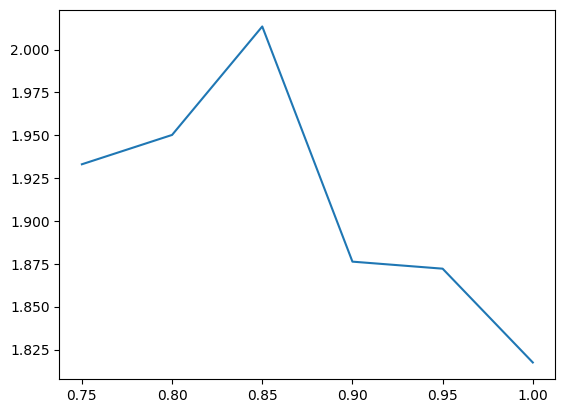

In [17]:
# plt.plot(x, GreedySL)
plt.plot(x, GreedyRL)
# plt.axis([max(x), min(x), min(GreedySL), max(GreedySL)])

In [4]:
r_offline = np.load('results/r_offline.npy')

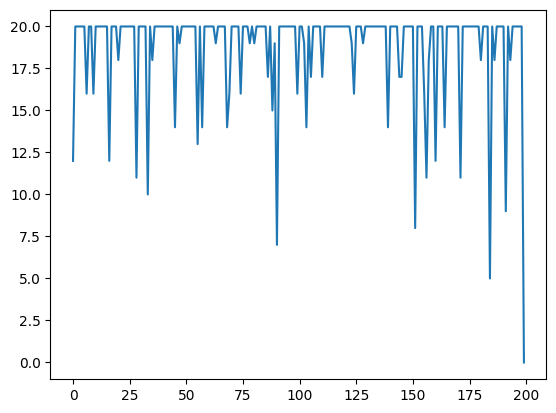

In [9]:
plt.plot(res_MSA["rs"])